<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/vopo/PKG_UPENN_GBM_NIfTI_files_image_sliced_for_3d_to_2d_and_sliced_into_64_parts_of_each_2d_images_along_z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3D Image to 2d along z axis total 155 slice are created and also we have taken T1 image as the brain regions are well define

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import nibabel as nib
import random
import glob
from matplotlib.gridspec import GridSpec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DATASET_PATH = r"/content/drive/MyDrive/PKG - UPENN-GBM NIfTI files/NIfTI-files/images_structural" +'/'

In [ ]:
test_image1_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1.nii')
test_image2_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00007_11/UPENN-GBM-00007_11_T1.nii')
test_image3_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00012_11/UPENN-GBM-00012_11_T1.nii')
test_image4_t1=nib.load(DATASET_PATH + 'UPENN-GBM-00017_11/UPENN-GBM-00017_11_T1.nii')
test_image1_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00002_11/UPENN-GBM-00002_11_T1.nii').get_fdata()
test_image2_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00007_11/UPENN-GBM-00007_11_T1.nii').get_fdata()
test_image3_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00012_11/UPENN-GBM-00012_11_T1.nii').get_fdata()
test_image4_t1_data=nib.load(DATASET_PATH + 'UPENN-GBM-00017_11/UPENN-GBM-00017_11_T1.nii').get_fdata()

Text(0.5, 1.0, 'Image4 T1')

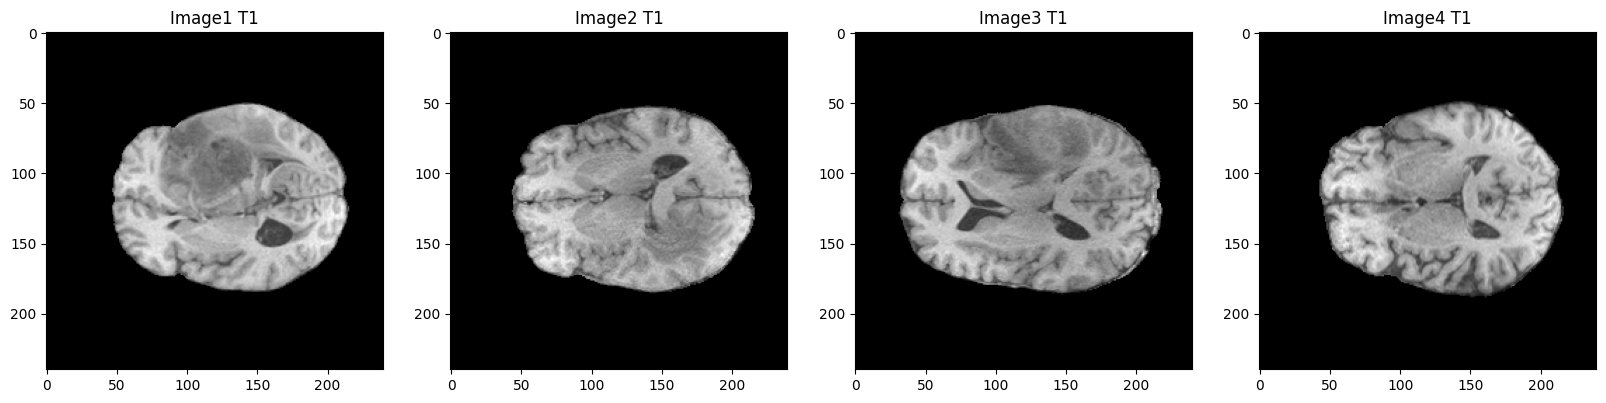

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20, 10))
ax1.imshow(test_image1_t1_data[:,:,70], cmap = 'gray')
ax1.set_title('Image1 T1')
ax2.imshow(test_image2_t1_data[:,:,70], cmap = 'gray')
ax2.set_title('Image2 T1')
ax3.imshow(test_image3_t1_data[:,:,70], cmap = 'gray')
ax3.set_title('Image3 T1')
ax4.imshow(test_image4_t1_data[:,:,70], cmap = 'gray')
ax4.set_title('Image4 T1')

In [ ]:
def min_max_shape_detector(image_data):
  print(np.min(image_data), np.max(image_data), image_data.shape, type(image_data))

In [ ]:
SLICE_DECIMATE_IDENTIFIER = 3
SLICE_X = False
SLICE_Y = False
SLICE_Z = True

In [ ]:
imageSliceOutput = r"/content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data"

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(DATASET_PATH)]

training_data_ids = pathListIntoIds(train_data_ids);

In [ ]:
training_data_ids.sort()

In [ ]:
first_20_ids = []
for i in range(0,20):
  first_20_ids.append(training_data_ids[i])


In [ ]:
first_20_ids[0]

'UPENN-GBM-00001_11'

In [ ]:
def saveSlice(nii_img, img_data, fname, path):
    slice_nii_img = nib.Nifti1Image(img_data, nii_img.affine)
    fout = os.path.join(path, f'{fname}.nii')
    nib.save(slice_nii_img,fout)
    print(f'[+] Slice saved: {fout}', end='\r')

#saveSlice(img,img_data[:,:,78], 'test', imageSliceOutput)

In [ ]:
data = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /data/test.nii').get_fdata()
plt.figure(figsize=(12, 4))
plt.subplot(131)  # 1 row, 3 columns, subplot 3
plt.imshow(data, cmap="gray")
plt.title("Image")

In [ ]:
# Slice image in all directions and save
def sliceAndSaveVolumeImage(nii_img, vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx):
            saveSlice(nii_img, vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)

    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy):
            saveSlice(nii_img, vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)

    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(nii_img, vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

In [ ]:
test = first_20_ids[0].split('-')[2]
test.split('_')[0]

'00001'

In [ ]:
for i in range(len(first_20_ids)):
  test = first_20_ids[i].split('-')[2]
  f = test.split('_')[0]
  filename1 = f'UPENN-GBM-Patients-{f}'
  image =nib.load(DATASET_PATH + f'{first_20_ids[i]}/{first_20_ids[i]}_T1.nii')
  image_data = image.get_fdata()
  print(filename1, image_data.shape, np.sum(image_data.shape), np.min(image_data), np.max(image_data))
  numOfSlices = sliceAndSaveVolumeImage(image, image_data, filename1, imageSliceOutput)
  print(f'\n{filename1}, {numOfSlices} slices created \n')


UPENN-GBM-Patients-00001 (240, 240, 155) 635 0.0 709.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data/UPENN-GBM-Patients-00001-slice154_z.nii
UPENN-GBM-Patients-00001, 155 slices created 

UPENN-GBM-Patients-00002 (240, 240, 155) 635 0.0 630.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data/UPENN-GBM-Patients-00002-slice154_z.nii
UPENN-GBM-Patients-00002, 155 slices created 

UPENN-GBM-Patients-00003 (240, 240, 155) 635 0.0 694.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data/UPENN-GBM-Patients-00003-slice154_z.nii
UPENN-GBM-Patients-00003, 155 slices created 

UPENN-GBM-Patients-00004 (240, 240, 155) 635 0.0 786.0
240 240 155
Slicing Z: 
[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data/UPENN-GBM-Patients-00004-sl

Text(0.5, 1.0, 'Image4 T1')

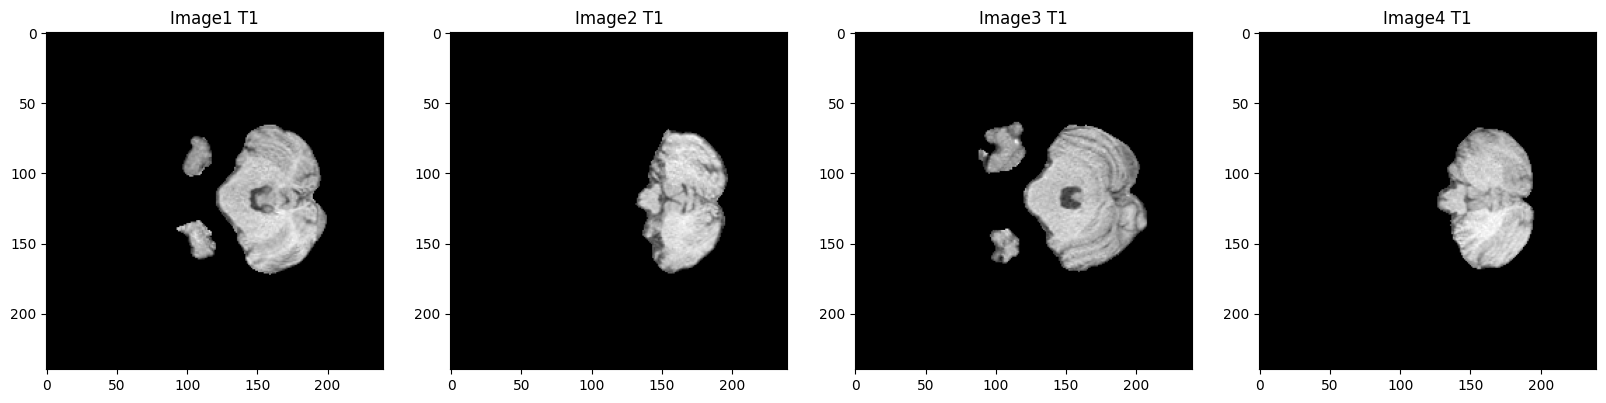

In [ ]:
data1 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/patients data /UPENN-GBM-Patients-99-slice025_z.nii').get_fdata()
data2 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/patients data /UPENN-GBM-Patients-74-slice025_z.nii').get_fdata()
data3 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/patients data /UPENN-GBM-Patients-49-slice025_z.nii').get_fdata()
data4 = nib.load('/content/drive/MyDrive/PKG - UPENN-GBM 3d to 2d /along z/patients data /UPENN-GBM-Patients-24-slice025_z.nii').get_fdata()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20, 10))
ax1.imshow(data1, cmap = 'gray')
ax1.set_title('Image1 T1')
ax2.imshow(data2, cmap = 'gray')
ax2.set_title('Image2 T1')
ax3.imshow(data3, cmap = 'gray')
ax3.set_title('Image3 T1')
ax4.imshow(data4, cmap = 'gray')
ax4.set_title('Image4 T1')

**Now slicing each 2D images into 64 parts **

In [ ]:
Data_path = imageSliceOutput

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(Data_path)]

training_data_ids = pathListIntoIds(train_data_ids);

In [ ]:
len(training_data_ids)

3100

In [ ]:
final_ids = []
for i in range(len(training_data_ids)):
  path = os.path.join(Data_path, training_data_ids[i])
  img = nib.load(path).get_fdata()
  if img.max() > img.min():
    final_ids.append(training_data_ids[i].split('.nii')[0])

In [ ]:
len(final_ids)

2812

In [ ]:
def normalized_imgfunc(img_data):
  data = ((img_data - img_data.min()) / (img_data.max() - img_data.min()))
  return data


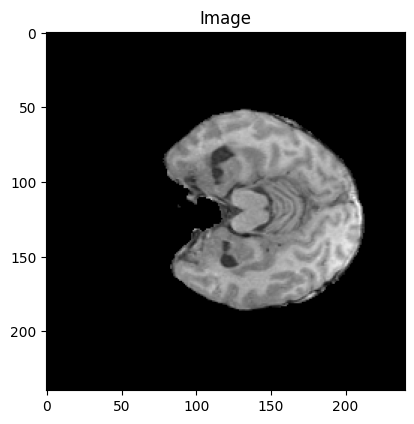

In [ ]:
path = os.path.join(Data_path, f'{final_ids[200]}.nii')
img = nib.load(path)
img_data = img.get_fdata()
normalized_img = normalized_imgfunc(img_data)

plt.figure(figsize=(12, 4))

# Plot the first 2D NIfTI image
plt.subplot(131)  # 1 row, 3 columns, subplot 1
plt.imshow(normalized_img, cmap="gray")
plt.title("Image")


plt.tight_layout()
plt.show()

In [ ]:
x_dim, y_dim = normalized_img.shape

# Split the image into 6 equal parts (2x3 grid)
x_split = x_dim // 8
y_split = y_dim // 8

subimages = []
c = 0
for i in range(8):
    for j in range(8):
        x_start, x_end = i * x_split, (i + 1) * x_split
        y_start, y_end = j * y_split, (j + 1) * y_split

        subimage = normalized_img[x_start:x_end, y_start:y_end]
        if subimage.max() > subimage.min():
         subimages.append([c,subimage])
        c = c+1

In [ ]:
len(subimages)

28

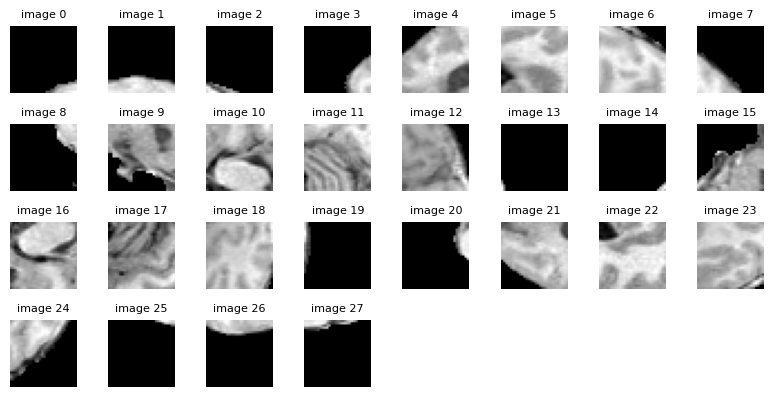

In [ ]:
# Create a figure and a grid of subplots (8x8)
fig = plt.figure(figsize=(8,8))
gs = GridSpec(8, 8, figure=fig)

# Loop through and display each image
for i in range(min(64, len(subimages))):
    img_data = subimages[i][1]
    ax = fig.add_subplot(gs[i])
    ax.imshow(img_data, cmap="gray")
    ax.set_title(f'image {i}', fontsize=8)
    ax.axis("off")

plt.tight_layout()  # Ensure proper layout
plt.show()  # Display the grid of images


In [ ]:
subimages[3][1].shape

(30, 30)

In [ ]:
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

In [ ]:
output_path = r"/content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts"

In [ ]:
final_ids[0]

'UPENN-GBM-Patients-00001-slice000_z'

In [ ]:
def numbering_block(ids,interval):
  final_list = []
  e =1
  for i in range(0,len(ids)):
    test1 = ids[i].split('.nii')[0]
    test2 = test1+f'-{str(e)}'
    final_list.append(test2)
    r = i+1
    if r % interval == 0:
      e = e+1
  return final_list


In [ ]:
training_data_ids.sort()

In [ ]:
int(training_data_ids[0].split('-')[3])

1

In [ ]:
len(r)

0

In [ ]:
r = []
final_list = []
p = 1
u =0
v =155
for o in range(1,21):
  for i in range(len(training_data_ids)):
    if int(training_data_ids[i].split('-')[3]) == p:
      e = 1
      for s in range(u,v):
        test1 = training_data_ids[s].split('.nii')[0]
        test2 = test1+f'-{str(e)}'
        final_list.append(test2)
        r = s+1
        if r % 15 == 0:
          e = e+1
      u = s+1
      v = v+155
      p=p+1

In [ ]:
final_list

In [ ]:
len(final_list)

3100

In [ ]:
for i in range(len(training_data_ids)):
    patients_no = training_data_ids[i].split('-')[3]
    path = os.path.join(Data_path, f'{training_data_ids[i]}')
    img = nib.load(path).get_fdata()
    normalized_img = normalized_imgfunc(img)
    x_dim, y_dim = normalized_img.shape
    x_split = x_dim // 8
    y_split = y_dim // 8

    c = 0
    for k in range(8):
        for j in range(8):
            x_start, x_end = k * x_split, (k + 1) * x_split
            y_start, y_end = j * y_split, (j + 1) * y_split

            subimage = normalized_img[x_start:x_end, y_start:y_end]
            ids = os.path.join(f'{final_list[i]}_{c}')
            if subimage.max() > subimage.min():
              saveSlice(subimage, ids, output_path)
            c = c + 1
    print(f'\n{final_list[i]}, {c} slices created \n')


[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00001-slice000_z-1_36.png
UPENN-GBM-Patients-00001-slice000_z-1, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00001-slice001_z-1_36.png
UPENN-GBM-Patients-00001-slice001_z-1, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00001-slice002_z-1_36.png
UPENN-GBM-Patients-00001-slice002_z-1, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00001-slice003_z-1_37.png
UPENN-GBM-Patients-00001-slice003_z-1, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-

<ipython-input-76-3c58384faa2f>:2: RuntimeWarning: invalid value encountered in divide
  data = ((img_data - img_data.min()) / (img_data.max() - img_data.min()))


Streaming output truncated to the last 5000 lines.
UPENN-GBM-Patients-00010-slice038_z-3, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00010-slice039_z-3_53.png
UPENN-GBM-Patients-00010-slice039_z-3, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00010-slice040_z-3_53.png
UPENN-GBM-Patients-00010-slice040_z-3, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00010-slice041_z-3_53.png
UPENN-GBM-Patients-00010-slice041_z-3, 64 slices created 

[+] Slice saved: /content/drive/MyDrive/PKG - UPENN-GBM NIFTI 3d to 2d exp 2/along z/patients data into 64 parts/UPENN-GBM-Patients-00010-slice042_z-3_53.png
UPENN-GBM-Patients-00010-slice042_z-3, 64 slices created 

[+] Slice saved: /cont